In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
data = pd.read_csv("car_sales.csv")

In [4]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
data.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


In [4]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

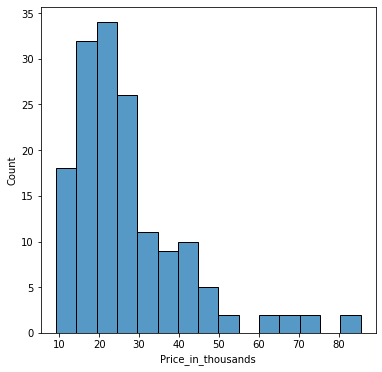

In [11]:
plt.subplots(figsize=(6,6))
sns.histplot(data['Price_in_thousands'])
plt.show()

C:\Users\mrary\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


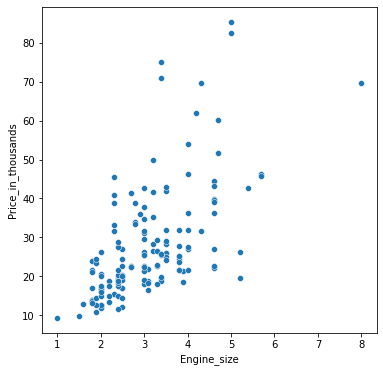

In [13]:
plt.subplots(figsize=(6,6))
sns.scatterplot(data['Engine_size'],data['Price_in_thousands'])
plt.show()

C:\Users\mrary\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


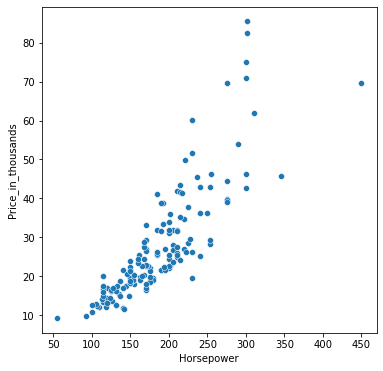

In [14]:

plt.subplots(figsize=(6,6))
sns.scatterplot(data['Horsepower'],data['Price_in_thousands'])
plt.show()

As horsepower increases, price also increases.

In [15]:
data['Price_Diff'] = data['Price_in_thousands'] - data['__year_resale_value']

C:\Users\mrary\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


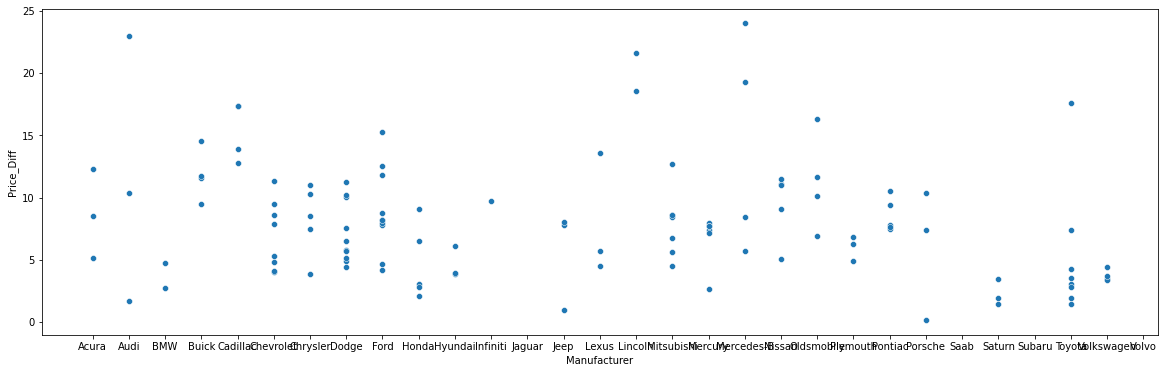

In [20]:
plt.subplots(figsize=(20,6))
sns.scatterplot(data['Manufacturer'],data['Price_Diff'])
plt.show()

In [5]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [9]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
data['Manufacturer'].value_counts()

Ford          11
Dodge         11
Mercedes-B     9
Toyota         9
Chevrolet      9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Volvo          6
Oldsmobile     6
Pontiac        6
Volkswagen     6
Lexus          6
Honda          5
Saturn         5
Cadillac       5
Plymouth       4
Buick          4
Acura          4
BMW            3
Jeep           3
Lincoln        3
Porsche        3
Hyundai        3
Audi           3
Saab           2
Subaru         2
Infiniti       1
Jaguar         1
Name: Manufacturer, dtype: int64

Most of the entries are of Ford & Dodge

In [11]:
data['Horsepower'].describe()

count    156.000000
mean     185.948718
std       56.700321
min       55.000000
25%      149.500000
50%      177.500000
75%      215.000000
max      450.000000
Name: Horsepower, dtype: float64

In [14]:
HP_Order =  data.sort_values(by=['Horsepower'],ascending = False)

In [16]:
HP_Order.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
39,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
24,Chevrolet,Corvette,17.947,36.225,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,5/12/2012,141.141150
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294


Dodge Viper has the most Horse Power

In [17]:
Fuel_Eff =  data.sort_values(by=['Fuel_efficiency'],ascending = False)

In [18]:
Fuel_Eff

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
26,Chevrolet,Metro,21.855,5.160,Passenger,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2012,23.276272
136,Toyota,Corolla,142.535,10.025,Passenger,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,4/11/2011,47.968972
130,Saturn,SC,24.546,10.590,Passenger,12.535,1.9,100.0,102.4,66.4,180.0,2.367,12.1,33.0,3/16/2011,40.700072
129,Saturn,SL,80.620,9.200,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425
25,Chevrolet,Prizm,32.299,9.125,Passenger,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9/11/2011,48.297636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Lincoln,Navigator,22.925,NaN,Car,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,12/23/2012,123.972047
41,Dodge,Ram Wagon,16.767,15.510,Car,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,1/6/2012,71.135292
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN
38,Dodge,Intrepid,88.028,12.275,Passenger,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,80.831470


Chevrolet Metro has the most fuel effeciency.

Data Manipulation

In [29]:
data['Year'] = data['Latest_Launch'].apply(lambda x:x[-4:])

In [31]:
data['Year'].value_counts()

2011    79
2012    75
2009     2
2008     1
Name: Year, dtype: int64

Most of the cars of 2011

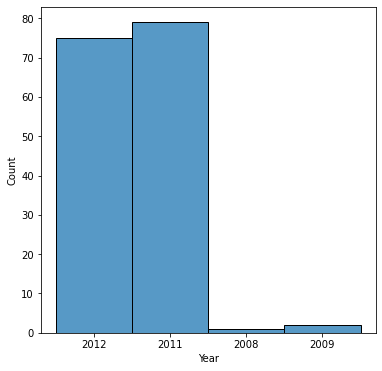

In [35]:
plt.subplots(figsize=(6,6))
sns.histplot(data=data,x='Year')
plt.show()

In [36]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,2011


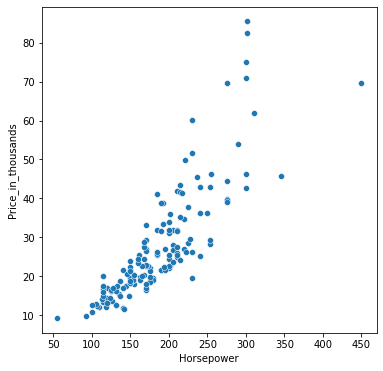

In [37]:
plt.subplots(figsize=(6,6))
sns.scatterplot(data=data,x='Horsepower',y='Price_in_thousands')
plt.show()

Now , I want to print the average prices of all the Manufactorers

In [60]:
All_Manu=np.array(data['Manufacturer'].unique())

In [61]:
def AveragePrice(man):
    temp_data = data[data['Manufacturer']==man]
    price_slice= temp_data['Price_in_thousands']
    return price_slice.mean()

In [62]:
All_Mean = np.array([])
for man in All_Manu:
    All_Mean=np.append(All_Mean,[AveragePrice(man)])

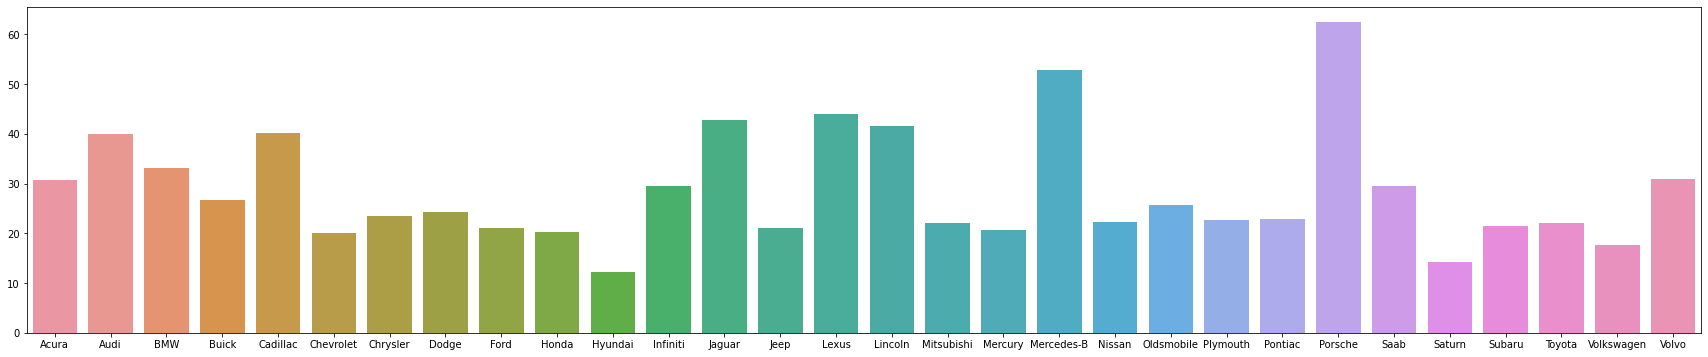

In [70]:
plt.subplots(figsize=(30,6))
sns.barplot(x=All_Manu,y=All_Mean)
plt.show()

In [87]:
DataFr = pd.DataFrame([])
DataFr['Companies']=All_Manu
DataFr['AvgPrice'] = All_Mean
DataFr = DataFr.sort_values(by='AvgPrice',ascending=False)

In [94]:
DataFr

,Companies,AvgPrice
23,Porsche,62.473333
18,Mercedes-B,52.916667
14,Lexus,44.055000
12,Jaguar,42.800000
15,Lincoln,41.690000
4,Cadillac,40.254000
1,Audi,39.980000
2,BMW,33.096667
29,Volvo,30.933333
0,Acura,30.633333


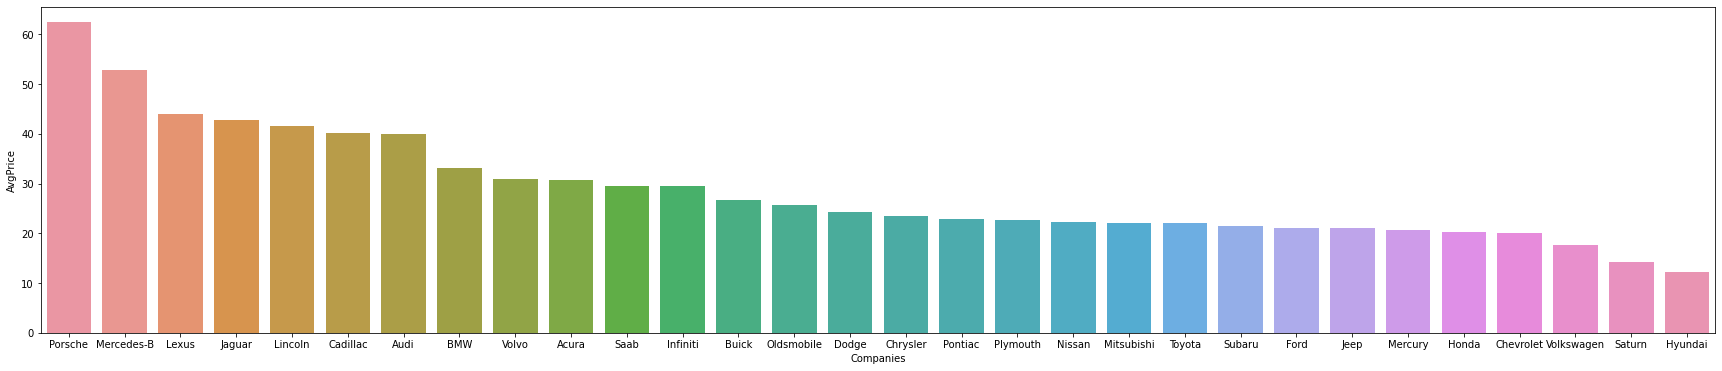

In [100]:
plt.subplots(figsize=(30,6))
sns.barplot(data=DataFr,x='Companies',y='AvgPrice')
plt.show()


As we can see Porsche has the highest average price followed by mercedes and jaguar

,Companies,AvgPrice
23,Porsche,62.473333
18,Mercedes-B,52.916667
14,Lexus,44.055000
12,Jaguar,42.800000
15,Lincoln,41.690000
4,Cadillac,40.254000
1,Audi,39.980000
2,BMW,33.096667
29,Volvo,30.933333
0,Acura,30.633333
